# Трансформация входных данных для линейной регрессии

В алгоритмах машинного обучения и анализа данных часто встречаются требования к входным данным

* распределение данных (имеется в виду вероятностное распределение – например, гауссовское или пуассоновское)
* масштаб данных

Перед аналитиком часто стоит задача трансформации (преобразования) входных данных таким образом, чтобы удовлетворить условиям алгоритма. Игнорирование требований к входным данным приводит к некорректным выводам, это основной принцип ML (и не только ML): **garbage in - garbage out**.

**Важно**: трансформации можно применять как к фичам, так и к целевым переменным

В задачах линейной регрессии (и других линейных моделях, [например, SVM](https://ru.wikipedia.org/wiki/Метод_опорных_векторов ), о котором мы узнаем далее в курсе) такие трансформации особенно важны – чтобы линейная регрессия хорошо работала должны выполняться следующие требования:

* остатки регрессии (величины $y_i-\hat{y_i}$) должны иметь нормальное (гауссово) распределение (это можно проверить, например, построив гистограмму, как мы учились в модуле про matplotlib)
* все фичи должны быть примерно в одном масшабе

При подготовке данных для обучения линейной регрессии применяются следyющие приемы: масштабирование и нормализация.

Сначала давайте проверим, как преобразование входных данных может повлиять на метрики

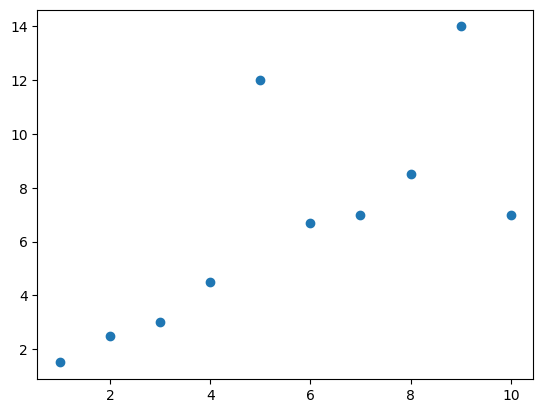

In [1]:
import numpy as np
from matplotlib import pyplot as  plt

%matplotlib inline

x = np.linspace(1, 10, num=10).reshape(-1,1)
y = [
    1.5,
    2.5,
    3,
    4.5,
    12,
    6.7,
    7,
    8.5,
    14,
    7
]

plt.scatter(x, y)
plt.show()

Видно, что данные вроде бы линейные, но есть выбросы

Обучим линейную регрессию на этом датасете и посмотрим, какой получился MSE

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

reg = LinearRegression().fit(x, y)
y_pred = reg.predict(x)

print(mean_squared_error(y, y_pred))

7.071587878787878
